<a href="https://colab.research.google.com/github/HamzaNaeem8920/boston-house-price-prediction/blob/main/BostonHouseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up Environment

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
path = 'C:/Users/Niner/DS_Test_II/Datasets/Boston.csv'

In [ ]:
data = pd.read_csv(path)
df = pd.DataFrame(data)

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## PreProcessing 

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.corrwith(df['medv']).sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
dtype: float64

In [ ]:
df.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [ ]:
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


## EDA

<AxesSubplot:>

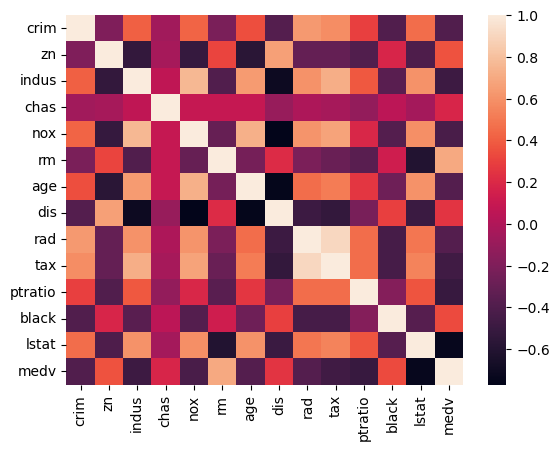

In [ ]:
sns.heatmap(df.corr().round(2))

C:\Users\Niner\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

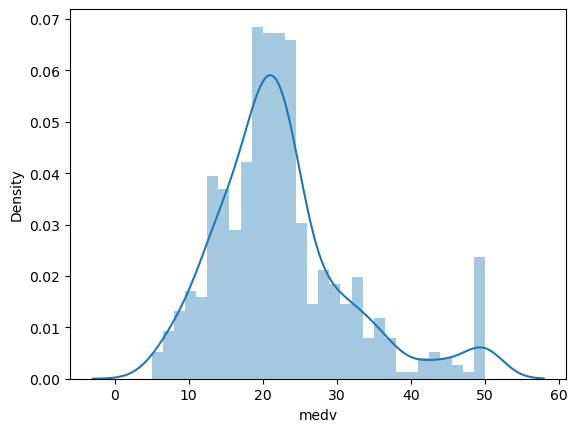

In [ ]:
sns.distplot(df['medv'], bins=30)

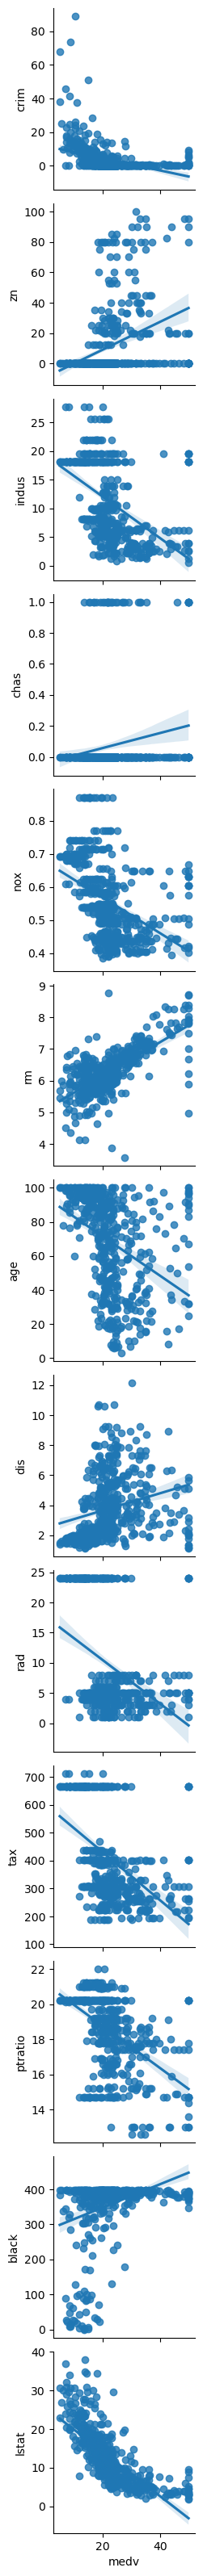

In [ ]:
sns.pairplot(x_vars='medv', y_vars=df.drop('medv', axis=1), kind='reg', data=df)

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

## Mutual Info

In [ ]:
discrete_features = X.dtypes == 'int'

In [ ]:
m_info = mutual_info_regression(X, y, discrete_features='auto')

In [ ]:
m_info = pd.Series(m_info, name='MI_Score',index=X.columns)

In [ ]:
m_info.sort_values(ascending=False)

lstat      0.668831
rm         0.527732
indus      0.468589
nox        0.460357
ptratio    0.439514
tax        0.361555
crim       0.335506
age        0.309871
dis        0.297353
rad        0.231250
zn         0.185280
black      0.160603
chas       0.026641
Name: MI_Score, dtype: float64

<AxesSubplot:>

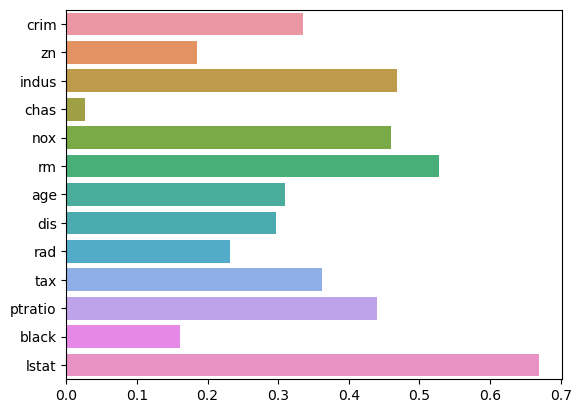

In [ ]:
sns.barplot(x=m_info.values, y=m_info.index)

In [ ]:
X = df[['lstat', 'rm','indus', 'nox', 'ptratio', 'tax', 'crim', 'age', 'dis']]

In [ ]:
m_info = mutual_info_regression(X, y, discrete_features='auto')

In [ ]:
m_info = pd.Series(m_info, name='MI_Score',index=X.columns)

In [ ]:
m_info.sort_values(ascending=False)

lstat      0.667979
rm         0.528866
nox        0.473755
indus      0.469108
ptratio    0.440548
tax        0.355014
crim       0.343401
age        0.313205
dis        0.299380
Name: MI_Score, dtype: float64

<AxesSubplot:>

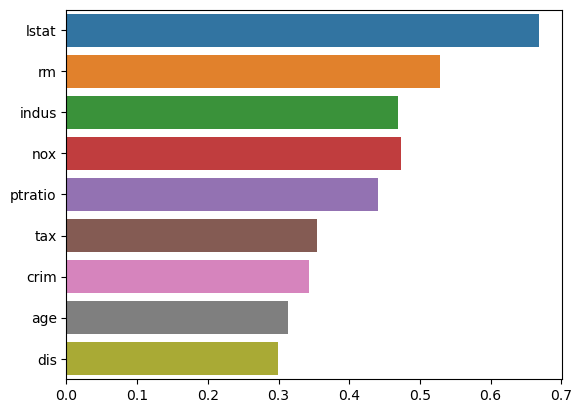

In [ ]:
sns.barplot(x=m_info.values, y=m_info.index)

## Train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
y_train_pred = model.predict(X_train)

## Evaluation

In [ ]:
model.score(X_train, y_train)

0.6826432975889836

In [ ]:
model.score(X_test, y_test)

0.7554498875191916

## RMSE

In [ ]:
np.sqrt(mean_squared_error(y_train, y_train_pred))

5.0760115626601205

In [ ]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

4.7343547744245065